In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import tensorflow as tf

In [2]:
print(f"Pandas: {pd.__version__} | NumPy: {np.__version__} | Sklearn: {sk.__version__} | Tensorflow: {tf.__version__}")

Pandas: 2.0.2 | NumPy: 1.24.3 | Sklearn: 1.2.2 | Tensorflow: 2.17.0


# Import Data

In [3]:
filepath = 'data/train.csv'

In [4]:
data = pd.read_csv(filepath)

In [5]:
data.shape

(42000, 785)

# Creating a model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Reshape, Flatten, Dense, Dropout
from tensorflow.keras.initializers import GlorotUniform, HeNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy

In [7]:
image_shape = (28, 28, 1)

In [27]:
model = Sequential([
    Reshape(image_shape),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation="relu"),
    AveragePooling2D((2, 2)),
    Flatten(),
    Dense(64, activation="relu", kernel_initializer=HeNormal),
    Dropout(0.6),
    Dense(10, activation="softmax", kernel_initializer=GlorotUniform)
])

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ ?                      │   0 (unbuilt) │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
opt = Adam(learning_rate=0.005)
early = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
loss = CategoricalCrossentropy()

# Data Preparing

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X, x_test, Y, y_test = train_test_split(data.drop(columns="label").values, data["label"].values, test_size=0.2, stratify=data["label"].values, random_state=42)

In [14]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Model Evaluation

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
model.compile(
    loss=loss,
    optimizer=opt,
    metrics=["accuracy"]
)

In [17]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [18]:
history = model.fit(x_train, y_train, epochs=100, batch_size=1000, validation_data=[x_val, y_val], callbacks=[early])

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.1083 - loss: 14.7807 - val_accuracy: 0.1942 - val_loss: 2.1896
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.1948 - loss: 2.1813 - val_accuracy: 0.2769 - val_loss: 1.9940
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.2581 - loss: 2.0159 - val_accuracy: 0.3299 - val_loss: 1.7399
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.3355 - loss: 1.7810 - val_accuracy: 0.4168 - val_loss: 1.5141
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.3937 - loss: 1.5384 - val_accuracy: 0.4754 - val_loss: 1.2977
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.4588 - loss: 1.3431 - val_accuracy: 0.5865 - val_loss: 1.1194
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.5404 - loss: 1.2052 - val_accuracy: 0.6110 - val_loss: 0.9852
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.5890 - loss: 1.0778 - val_accuracy: 0

In [19]:
loss, accuracy = model.evaluate(x_test, to_categorical(y_test), verbose=1)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9356 - loss: 0.2610
Loss: 0.2537875175476074
Accuracy: 0.9364285469055176


In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [21]:
y_pred = model.predict(x_test, verbose=1)

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [22]:
y_pred = np.argmax(y_pred, axis=1)

In [23]:
print("Precision: %.3f" % precision_score(y_test, y_pred, average="weighted"))
print("Recall: %.3f" % recall_score(y_test, y_pred, average="weighted"))
print("F1-score: %.3f" % f1_score(y_test, y_pred, average="weighted"))

Precision: 0.937
Recall: 0.936
F1-score: 0.937


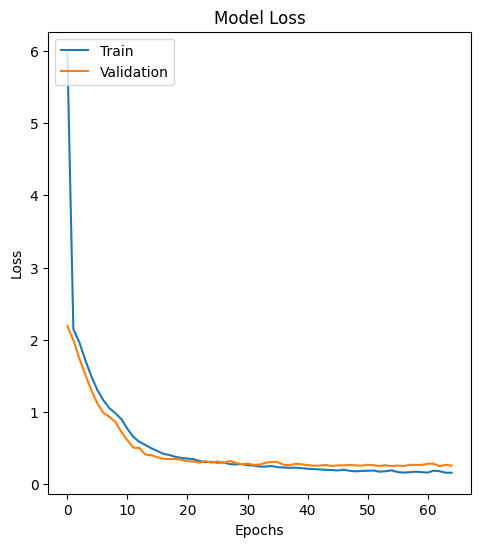

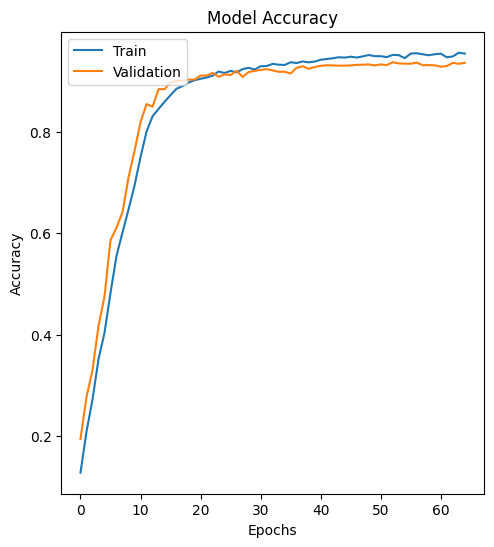

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="upper left")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

# Save Model

In [25]:
model_file_name = "models/recognizer2.keras"

In [26]:
model.save(model_file_name)